# 그래프와 시각화 3편

__참고:__ 웨스 맥키니의 <파이썬 라이브러리를 활용한 데이터 분석>의 9장 2절에 사용된 소스코드를 활용한다.

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## pandas로 그래프 그리기

판다스의 시리즈(Series)와 데이터프레임(Dataframe) 객체 모두 `plot()` 메서드를 지원한다. 
실제로는 `plt.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하다.
자세한 옵션과 사용법은 공식문서를 참고한다. 

- `pd.Seris.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html
- `pd.DataFrame.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### 시리즈와 선그래프

시리즈의 선그래프는 하나이며, y축 좌표는 행별 값이며, x축 좌표는 기본적으로 인덱스가 사용된다.

In [2]:
np.random.seed(12345)
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [3]:
s

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64

<AxesSubplot:>

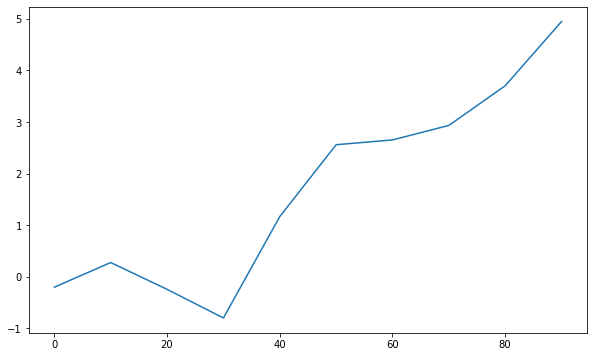

In [4]:
s.plot()

### 데이터프레임과 선그래프

데이터프레임의 선그래프는 특성 수만큼 그려지며, y축 좌표는 특성별 항목이며, x축 좌표는 기본적으로 인덱스가 사용된다.

In [5]:
np.random.seed(12345)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df

,A,B,C,D
0,-0.204708,0.478943,-0.519439,-0.555730
10,1.761073,1.872349,-0.426531,-0.273984
20,2.530095,3.118784,0.580659,-1.570205
30,2.805087,3.347697,1.933575,-0.683776
40,0.803450,2.975854,3.602601,-1.122346
50,0.263708,3.452839,6.851545,-2.143573
60,-0.313379,3.576961,7.154158,-1.619801
70,-0.312439,4.920770,6.440614,-2.450955
80,-2.682670,3.060010,5.579857,-1.890809
90,-3.948605,3.179837,4.516344,-1.557927


특성 이름이 범례로 지정된다.

<AxesSubplot:>

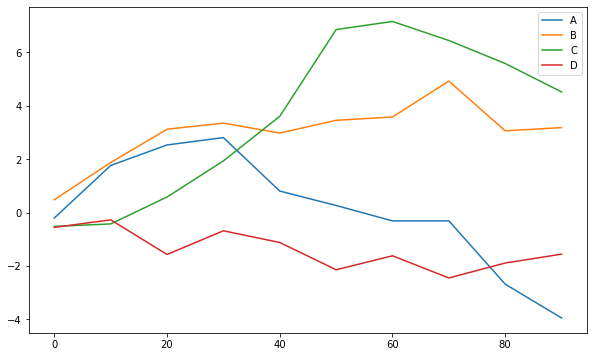

In [6]:
df.plot()

`subplots=True` 키워드 인자를 사용하면 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

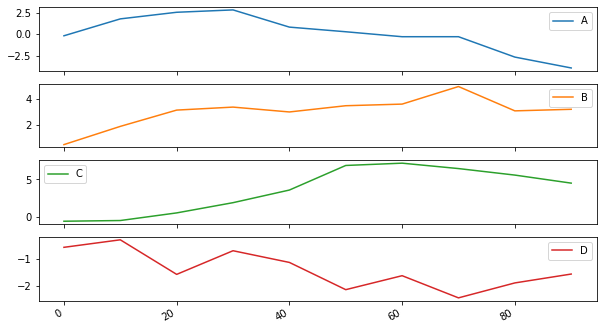

In [7]:
np.random.seed(12345)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(subplots=True)

### 시리즈와 막대그래프

- 수직 막대그래프: `pd.Series.plot.bar()`
- 수평 막대그래프: `pd.Series.plot.barh()`

아래 코드는 시리즈를 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

In [8]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [9]:
data

a    0.929616
b    0.316376
c    0.183919
d    0.204560
e    0.567725
f    0.595545
g    0.964515
h    0.653177
i    0.748907
j    0.653570
k    0.747715
l    0.961307
m    0.008388
n    0.106444
o    0.298704
p    0.656411
dtype: float64

__참고:__ 서브플롯을 지정하려면 `ax=서브플롯` 옵션을 지정하면 되며, 이른 시리즈와 데이터프레임의
모든 그래프 함수에 사용된다.
아래 데이터는 (2,1) 모양의 `Figure` 객체에 포함된 두 개의 서브플롯에 각각 수직/수평 막대그래프를 삽입한다.

<AxesSubplot:>

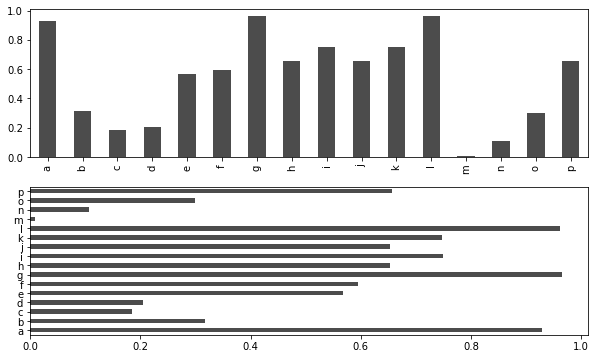

In [10]:
fig, axes = plt.subplots(2, 1)

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<AxesSubplot:>

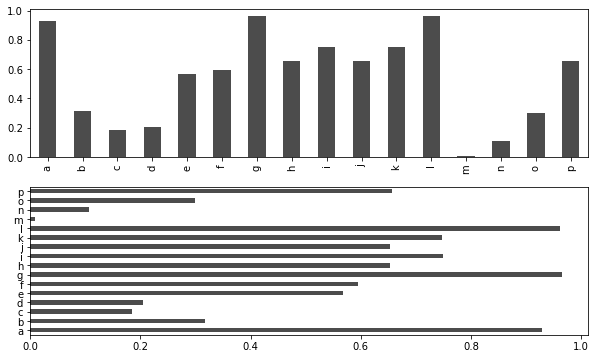

In [11]:
fig, axes = plt.subplots(2, 1)

data.plot(ax=axes[0], kind='bar', color='k', alpha=0.7)
data.plot(ax=axes[1], kind='barh', color='k', alpha=0.7)

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pd.DataFrame.plot.bar()`
- 수평 막대그래프: `pd.DataFrame.plot.barh()`

아래 코드는 데이터프레임을 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 사용된다. 아래 코드에서는 Genus이다. 
- 행별 막대그래프를 하나로 묶어서 보여준다.

In [12]:
np.random.seed(12348)

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<AxesSubplot:>

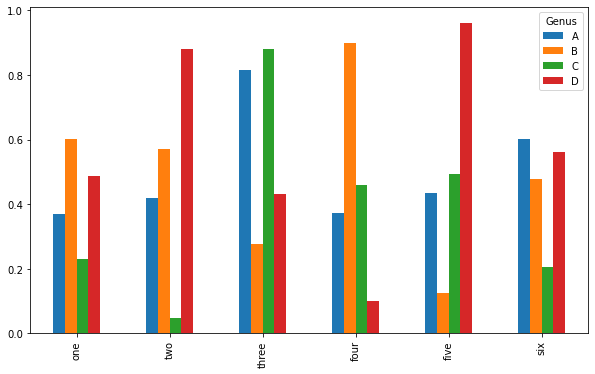

In [13]:
df.plot.bar()

<AxesSubplot:>

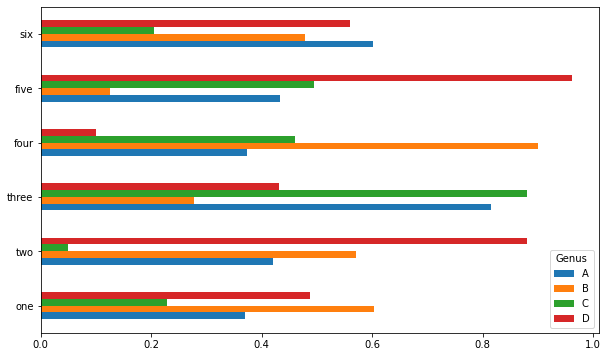

In [14]:
df.plot.barh()

#### 누적막대그래프

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적되어 출력된다.

<AxesSubplot:>

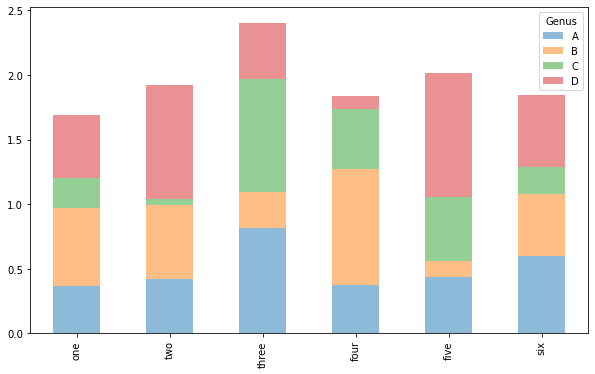

In [15]:
df.plot.bar(stacked=True, alpha=0.5)

<AxesSubplot:>

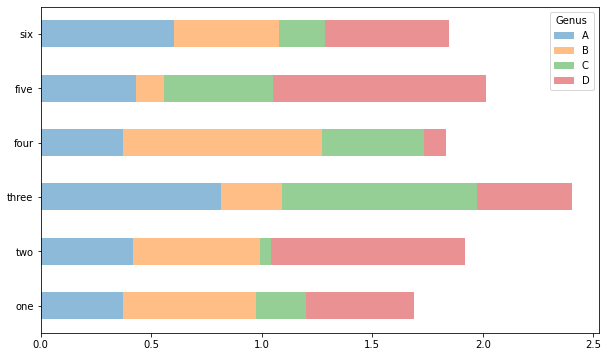

In [16]:
df.plot.barh(stacked=True, alpha=0.5)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<AxesSubplot:>

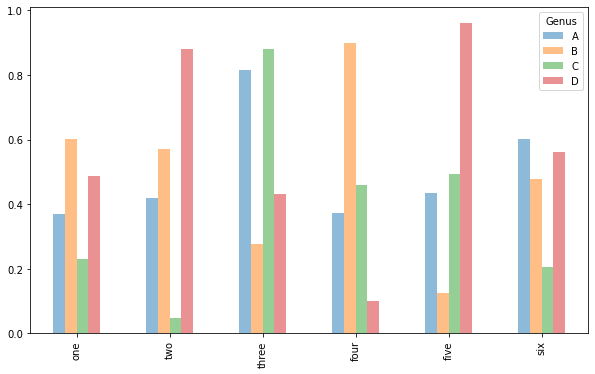

In [17]:
df.plot(kind='bar', alpha=0.5)

<AxesSubplot:>

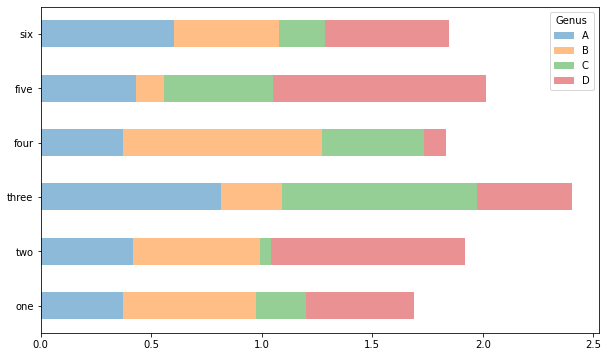

In [18]:
df.plot(kind='barh', stacked=True, alpha=0.5)

### 예제: 서비스 팁(tip) 데이터 그래프 그리기

요일별 파티 숫자 대비 서비스 팁 비율의 관계를 막대그래프로 그려보자.

In [19]:
tips_path = 'https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/examples/tips.csv'

In [20]:
tips = pd.read_csv(tips_path)

tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


열별 특성은 다음과 같다.

- `total_bill`: 총 비용
- `tip`: 서비스 팁
- `smoker`: 흡연 여부 
- `day`: 요일
- `time`: 점심/저녁 
- `size`: 파티 참여인원 수

범주형 데이터에 사용된 값들은 다음과 같다.

In [21]:
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [23]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

`'size'` 특성은 해당 요일의 파티 횟수를 가리키며 하루에 최소 1번, 최대 6번 열렸다.

In [24]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

#### 교차 테이블

In [25]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [26]:
# 1인과 6인 파티 제외
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [27]:
# 각 행의 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

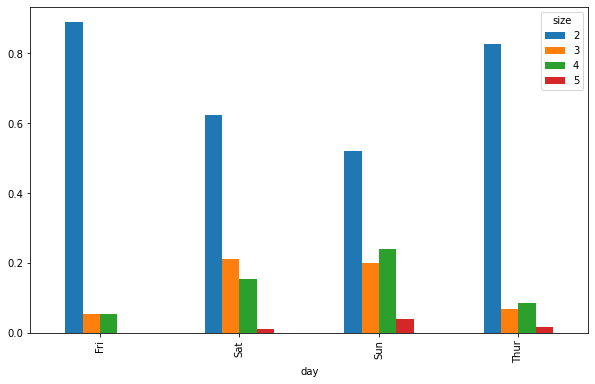

In [28]:
party_pcts.plot.bar()

## seanborn으로 그래프 그리기

#### seaborn 패키지 활용

- matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API 제공 라이브러리.

In [29]:
import seaborn as sns

요일별 팁

In [30]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

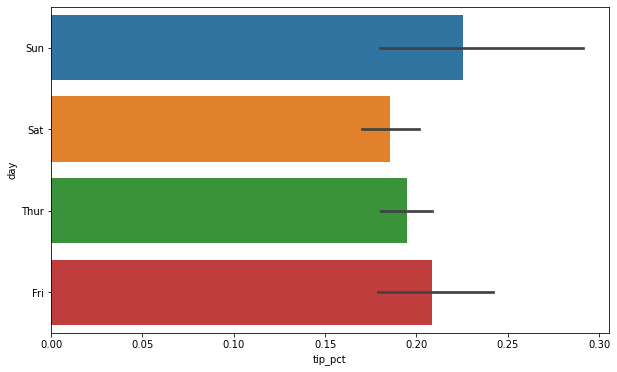

In [31]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

* `hue='time'`: 시간 기준 추가 분류

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

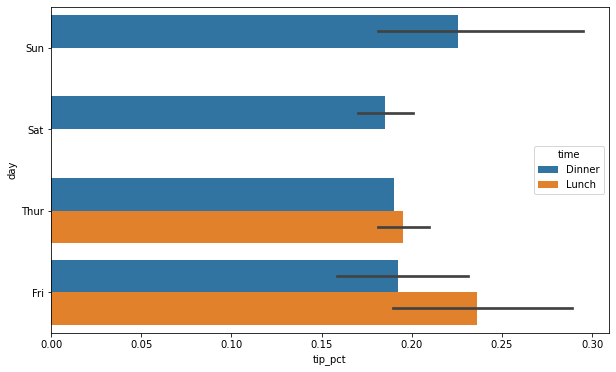

In [32]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

설정 변경

In [33]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

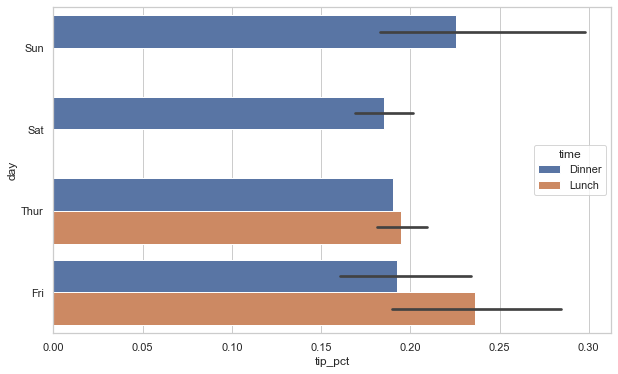

In [34]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

__참고:__ 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문이다.

In [35]:
A = tips['day']=='Thur'
A

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243     True
Name: day, Length: 244, dtype: bool

In [36]:
B = tips['time']=='Dinner'
B.sum()

176

In [37]:
tips[A & B]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


### 히스토그램과 밀도그래프

<AxesSubplot:ylabel='Frequency'>

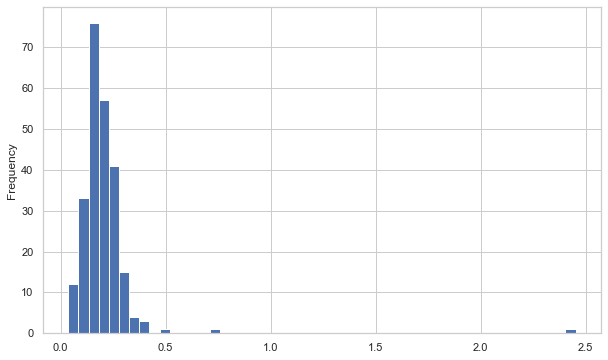

In [38]:
plt.figure()

tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

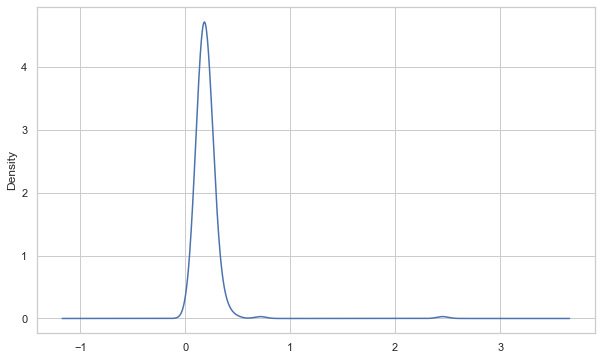

In [39]:
plt.figure()

tips['tip_pct'].plot.density()

seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.

__주의사항:__ 책에서 사용한 아래 함수는 더 이상 지원되지 않는다.

```python
sns.distplot(values, bins=100, color='k')
```

대신 `sns.histplot()` 또는 `sns.displot()` 함수를 `kde=True` 옵션과 함께 사용한다.

<AxesSubplot:ylabel='Count'>

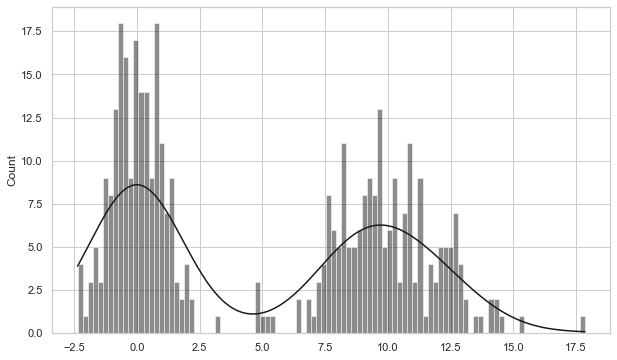

In [40]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color='k', kde=True)

`sns.displot()` 사용할 경우 사이즈와 가로세로 비율이 다르다.

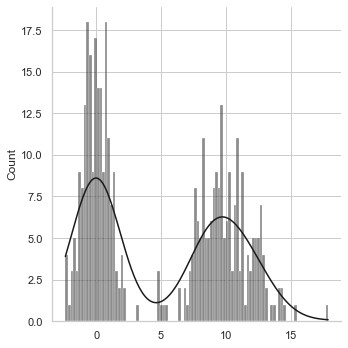

In [41]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k', kde=True)

하지만 `height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

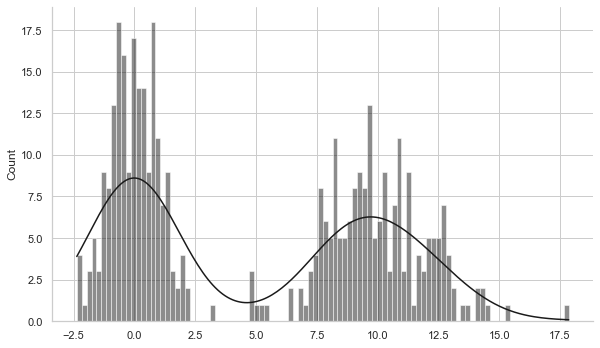

In [42]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k', kde=True, height=5, aspect=1.7)

#### 예제: 서비스 팁 비율의 히스토그램과 밀도 그래프

In [43]:
data = tips['tip_pct']

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

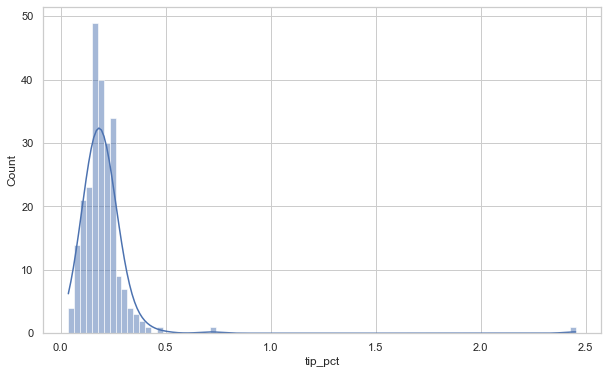

In [44]:
sns.histplot(data, kde=True)

### 산점도

In [45]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [46]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


In [47]:
np.log(data)

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659
...,...,...,...,...
198,5.379386,7.296210,0.157004,1.791759
199,5.357407,7.362962,-2.120264,1.931521
200,5.359746,7.373249,-1.514128,2.091864
201,5.368165,7.410710,-1.714798,2.219203


#### 산점도와 선형회귀 곡선

__참고:__ 아래 방식은 더 이상 지원되지 않는다.

```python
sns.regplot('m1', 'unemp', data=trans_data)
```

대신 아래 방식을 사용해야 한다.

```python
sns.regplot(x='m1', y='unemp', data=trans_data)
```

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

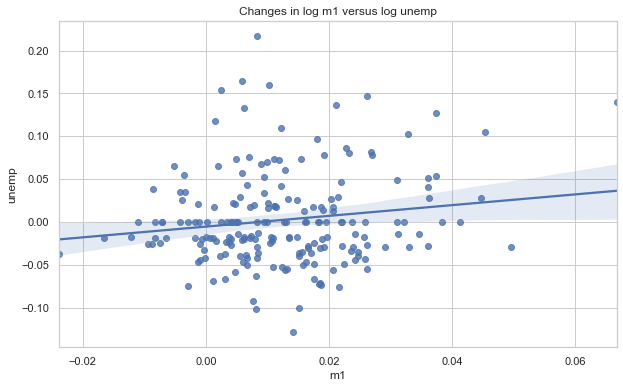

In [48]:
plt.figure()

sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

#### 산점도 행렬

- 대각선은 기본적으로 도수분포도를 히스토그램으로 그린 그래프를 보여준다.

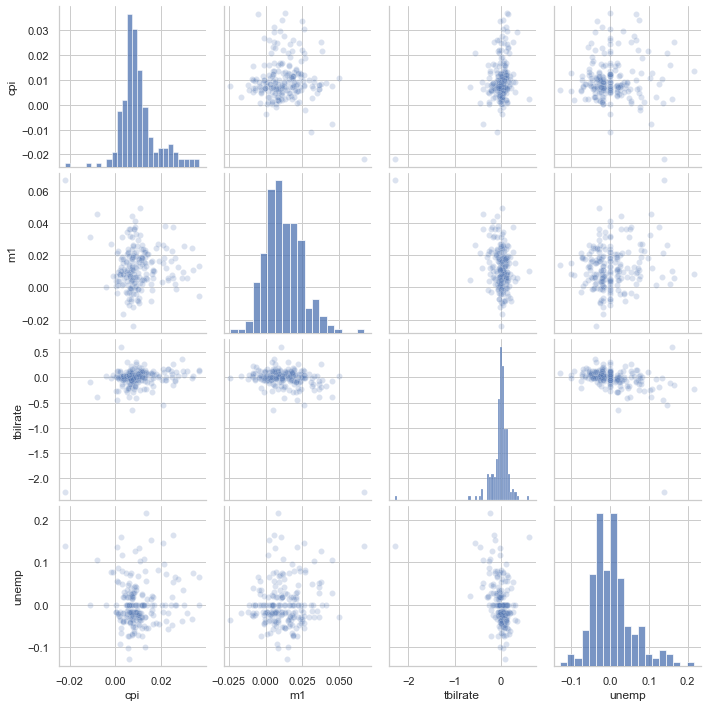

In [49]:
sns.pairplot(trans_data, plot_kws={'alpha': 0.2})

`diag_kind=kde` 옵션을 사용하면 밀도그래프를 대각선상에 사용한다.

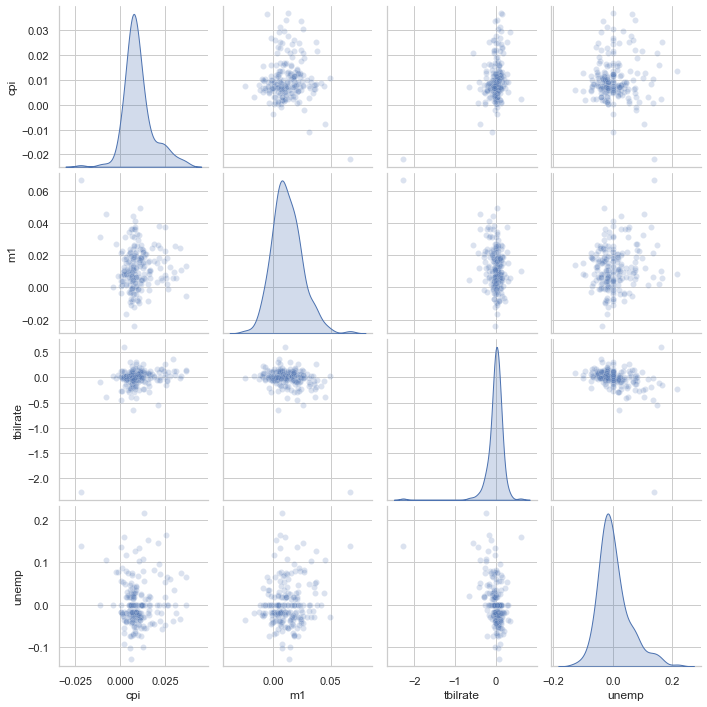

In [50]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 면 분할(Facet Grids)와 범주형 데이터

__참고:__ `sns.factorplot()` 함수 이름이 `sns.catplot()` 으로 변경되었다.

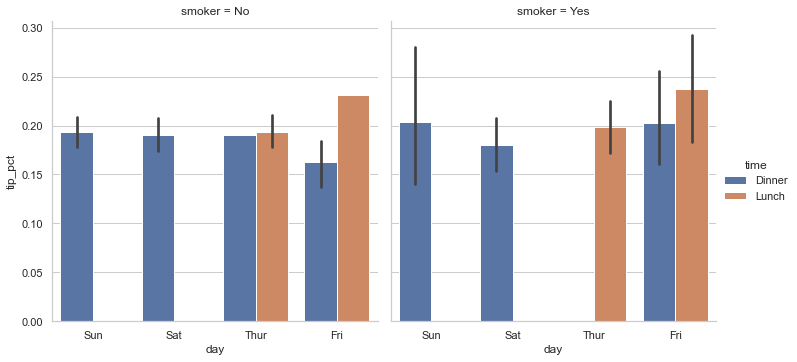

In [52]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

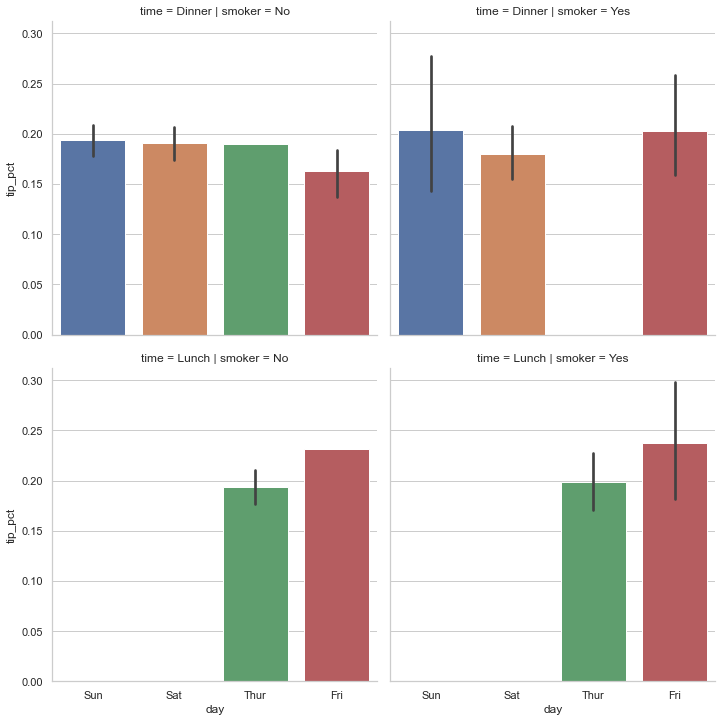

In [53]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

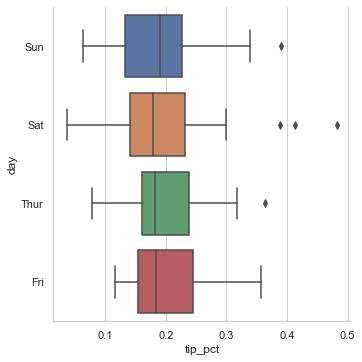

In [54]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])